In [ ]:
#1. Univariate Selection

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [5]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [6]:
fit = bestfeatures.fit(X,y)

In [7]:
dfscores = pd.DataFrame(fit.scores_)

In [8]:
dfcolumns = pd.DataFrame(X.columns)

In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [10]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [11]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [ ]:
#2. Feature Importance

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [13]:
model = ExtraTreesClassifier()

In [14]:
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.06088743 0.01965246 0.03370297 0.01923719 0.03163779 0.01698958
 0.03593623 0.03411121 0.03632838 0.03292721 0.03289561 0.04695895
 0.04901321 0.39144383 0.03480059 0.03434165 0.03523683 0.0139726
 0.01968475 0.02024154]


In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

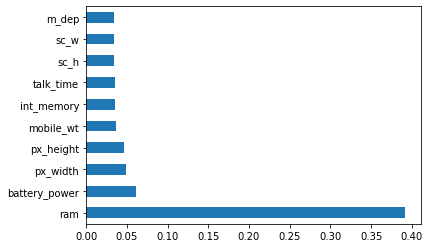

In [18]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#3.Correlation Matrix with Heatmap

In [19]:
import seaborn as sns

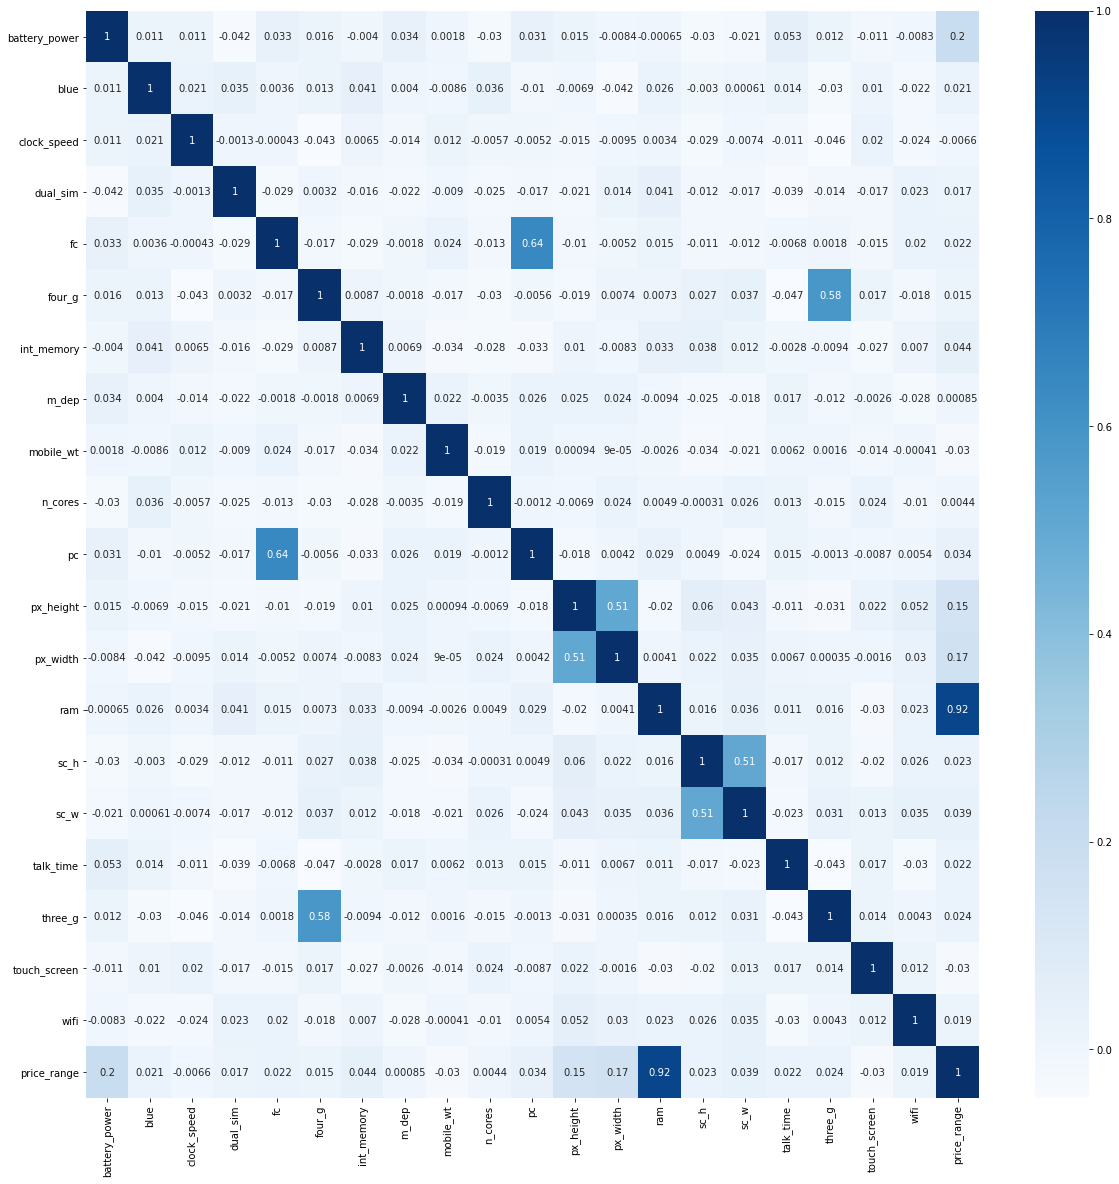

In [23]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues")